# 6.5.1 Best Subset Selection

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('../datasets/Hitters.csv', index_col=0)

In [3]:
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [4]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.00,322.00,322.00,322.00,322.00,322.00,...,322.00,322.00,322.00,322.00,322.00,263.00
mean,380.93,101.02,10.77,50.91,48.03,38.74,...,330.12,260.24,288.94,106.91,8.04,535.93
std,153.40,46.45,8.71,26.02,26.17,21.64,...,333.22,267.06,280.70,136.85,6.37,451.12
min,16.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,67.50
25%,255.25,64.00,4.00,30.25,28.00,22.00,...,88.75,67.25,109.25,7.00,3.00,190.00
50%,379.50,96.00,8.00,48.00,44.00,35.00,...,220.50,170.50,212.00,39.50,6.00,425.00
75%,512.00,137.00,16.00,69.00,64.75,53.00,...,426.25,339.25,325.00,166.00,11.00,750.00
max,687.00,238.00,40.00,130.00,121.00,105.00,...,"1,659.00","1,566.00","1,378.00",492.00,32.00,"2,460.00"


In [5]:
df.sample(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Ernest Riles,524,132,9,69,47,54,...,E,212,327,20,nan,A
-Andre Dawson,496,141,20,65,78,37,...,E,200,11,3,500.00,N
-Joe Carter,663,200,29,108,121,32,...,E,241,8,6,250.00,A
-Garry Templeton,510,126,2,42,44,35,...,W,207,358,20,737.50,N
-Mickey Tettleton,211,43,10,26,35,39,...,W,463,32,8,120.00,A


In [6]:
hitters = df.dropna()

In [7]:
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.00,263.00,263.00,263.00,263.00,263.00,...,263.00,263.00,263.00,263.00,263.00,263.00
mean,403.64,107.83,11.62,54.75,51.49,41.11,...,330.42,260.27,290.71,118.76,8.59,535.93
std,147.31,45.13,8.76,25.54,25.88,21.72,...,323.37,264.06,279.93,145.08,6.61,451.12
min,19.00,1.00,0.00,0.00,0.00,0.00,...,3.00,1.00,0.00,0.00,0.00,67.50
25%,282.50,71.50,5.00,33.50,30.00,23.00,...,95.00,71.00,113.50,8.00,3.00,190.00
50%,413.00,103.00,9.00,52.00,47.00,37.00,...,230.00,174.00,224.00,45.00,7.00,425.00
75%,526.00,141.50,18.00,73.00,71.00,57.00,...,424.50,328.50,322.50,192.00,13.00,750.00
max,687.00,238.00,40.00,130.00,121.00,105.00,...,"1,659.00","1,566.00","1,377.00",492.00,32.00,"2,460.00"


In [8]:
hitters.index.name = 'Player'

In [9]:
hitters.tail(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,
-Willie McGee,497,127,7,65,48,37,...,E,325,9,3,700.00,N
-Willie Randolph,492,136,5,76,50,94,...,E,313,381,20,875.00,A
-Wayne Tolleson,475,126,3,61,43,52,...,W,37,113,7,385.00,A
-Willie Upshaw,573,144,9,85,60,78,...,E,1314,131,12,960.00,A
-Willie Wilson,631,170,9,77,44,31,...,W,408,4,3,"1,000.00",A


In [10]:
hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end

In [11]:
hitters.tail(5)

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,NewLeague,Salary
Player,,,,,,,,,,,,,
-Willie McGee,497,127,7,65,48,37,...,E,325,9,3,N,700.00
-Willie Randolph,492,136,5,76,50,94,...,E,313,381,20,A,875.00
-Wayne Tolleson,475,126,3,61,43,52,...,W,37,113,7,A,385.00
-Willie Upshaw,573,144,9,85,60,78,...,E,1314,131,12,A,960.00
-Willie Wilson,631,170,9,77,44,31,...,W,408,4,3,A,"1,000.00"


In [12]:
hitters['League'].unique()

array(['N', 'A'], dtype=object)

In [13]:
hitters[['League','Division','NewLeague']].nunique()

League       2
Division     2
NewLeague    2
dtype: int64

In [14]:
pd.get_dummies(hitters['League']).iloc[:,0]

Player
-Alan Ashby          0
-Alvin Davis         1
-Andre Dawson        0
-Andres Galarraga    0
-Alfredo Griffin     1
-Al Newman           0
                    ..
-Wally Joyner        1
-Willie McGee        0
-Willie Randolph     1
-Wayne Tolleson      1
-Willie Upshaw       1
-Willie Wilson       1
Name: A, Length: 263, dtype: uint8

In [15]:
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]


X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [16]:
# adapted from: 
# https://songhuiming.github.io/pages/2016/07/12/variable-selection-in-python/
# and:
# http://www.science.smith.edu/~jcrouser/SDS293/labs/
# takes a f**in' long time
# Already stored as pickle File
##########################################################################

k_features = 1

sub = []
reg = []
kft = []

n_features = X.shape[1]

for k_features in range(1, 20):
    subsets = chain(combinations(range(n_features), k_features))
    best_score = np.inf

    for subset in subsets:
        lin_reg = sm.OLS(y, sm.add_constant(X.iloc[:, list(subset)])).fit()
        score = lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, list(subset)
            best_reg = lin_reg
            
    print(list(subset))
    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(k_features)

results1 = pd.DataFrame({'kft': kft, 'sub': sub, 'reg': reg},
                       columns = ['sub', 'reg', 'kft']).set_index('kft')

[18]
[17, 18]
[16, 17, 18]
[15, 16, 17, 18]
[14, 15, 16, 17, 18]
[13, 14, 15, 16, 17, 18]
[12, 13, 14, 15, 16, 17, 18]
[11, 12, 13, 14, 15, 16, 17, 18]
[10, 11, 12, 13, 14, 15, 16, 17, 18]
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [33]:
results1

,sub,reg
kft,,
1,[11],<statsmodels.regression.linear_model.Regressio...
2,"[1, 11]",<statsmodels.regression.linear_model.Regressio...
3,"[1, 11, 15]",<statsmodels.regression.linear_model.Regressio...
4,"[1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
5,"[0, 1, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
6,"[0, 1, 5, 11, 14, 15]",<statsmodels.regression.linear_model.Regressio...
...,...,...
14,"[0, 1, 2, 3, 5, 7, 10, 11, 12, 13, 14, 15, 16,...",<statsmodels.regression.linear_model.Regressio...
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",<statsmodels.regression.linear_model.Regressio...


In [36]:
full_model = results1['reg'][19]

In [40]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           7.84e-32
Time:                        08:40:42   Log-Likelihood:                -1876.2
No. Observations:                 263   AIC:                             3792.
Df Residuals:                     243   BIC:                             3864.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0914     86.201      0.976      0.330     -85.704     253.887
AtBat         -1.9799      0.634     -3.123      0.002      -3.229      -0.731
Hits           7.5008      2.378      3.155      0.002       2.818      12.184
HmRun          4.3309      6.201      0.698      0.486      -7.885      16.546
Runs          -2.3762      2.981     -0.797      0.426      -8.248       3.495
RBI           -1.0450      2.601     -0.402      0.688      -6.168       4.078
Walks          6.2313      1.829      3.408      0.001       2.630       9.833
Years         -3.4891     12.412     -0.281      0.779     -27.938      20.960
CAtBat        -0.1713      0.135     -1.267      0.206      -0.438       0.095
CHits          0.1340      0.675      0.199      0.843      -1.195       1.463
CHmRun        -0.1729      1.617     -0.107      0.915      -3.358       3.013
CRuns          1.4543      0.750      1.938      0.054      -0.024       2.933
CRBI           0.8077      0.693      1.166      0.245      -0.557       2.172
CWalks        -0.8116      0.328     -2.474      0.014      -1.458      -0.165
League       -62.5994     79.261     -0.790      0.430    -218.727      93.528
Division     116.8492     40.367      2.895      0.004      37.335     196.363
PutOuts        0.2819      0.077      3.640      0.000       0.129       0.434
Assists        0.3711      0.221      1.678      0.095      -0.065       0.807
Errors        -3.3608      4.392     -0.765      0.445     -12.011       5.290
NewLeague     24.7623     79.003      0.313      0.754    -130.855     180.380
==============================================================================
Omnibus:                       87.414   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.923
Skew:                           1.236   Prob(JB):                     4.46e-99
Kurtosis:                       8.934   Cond. No.                     2.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
full_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.511    
Dependent Variable: Salary           AIC:                3792.3828
Date:               2019-01-09 08:41 BIC:                3863.8259
No. Observations:   263              Log-Likelihood:     -1876.2  
Df Model:           19               F-statistic:        15.39    
Df Residuals:       243              Prob (F-statistic): 7.84e-32 
R-squared:          0.546            Scale:              99591.   
-------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
-------------------------------------------------------------------
const       84.0914   86.2007   0.9755  0.3303   -85.7044  253.8873
AtBat       -1.9799    0.6340  -3.1229  0.0020    -3.2287   -0.7311
Hits         7.5008    2.3775   3.1549  0.0018     2.8176   12.1840
HmRun        4.3309    6.2014   0.6984  0.4856    -7.8846   16.5463
Runs        -2.3762    2.9808  -0.7972  0.4261    -8.2476    3.4952
RBI         -1.0450    2.6009  -0.4018  0.6882    -6.1681    4.0782
Walks        6.2313    1.8285   3.4079  0.0008     2.6295    9.8330
Years       -3.4891   12.4122  -0.2811  0.7789   -27.9383   20.9602
CAtBat      -0.1713    0.1352  -1.2670  0.2064    -0.4377    0.0950
CHits        0.1340    0.6746   0.1986  0.8427    -1.1947    1.4627
CHmRun      -0.1729    1.6172  -0.1069  0.9150    -3.3585    3.0127
CRuns        1.4543    0.7505   1.9379  0.0538    -0.0239    2.9325
CRBI         0.8077    0.6926   1.1662  0.2447    -0.5566    2.1720
CWalks      -0.8116    0.3281  -2.4737  0.0141    -1.4578   -0.1653
League     -62.5994   79.2614  -0.7898  0.4304  -218.7265   93.5277
Division   116.8492   40.3670   2.8947  0.0041    37.3355  196.3630
PutOuts      0.2819    0.0774   3.6401  0.0003     0.1294    0.4344
Assists      0.3711    0.2212   1.6775  0.0947    -0.0646    0.8068
Errors      -3.3608    4.3916  -0.7653  0.4449   -12.0113    5.2898
NewLeague   24.7623   79.0026   0.3134  0.7542  -130.8550  180.3797
------------------------------------------------------------------
Omnibus:              87.414       Durbin-Watson:          2.018  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       452.923
Skew:                 1.236        Prob(JB):               0.000  
Kurtosis:             8.934        Condition No.:          20817  
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [17]:
results = pd.read_pickle('results_651')

In [18]:
results

,sub,rss,aic,bic,r2a
kft,,,,,
1,[11],"36,179,679.26","3,862.14","3,869.28",0.32
2,"[1, 11]","30,646,559.89","3,820.49","3,831.20",0.42
3,"[1, 11, 15]","29,249,296.86","3,810.21","3,824.50",0.45
4,"[1, 11, 14, 15]","27,970,851.82","3,800.46","3,818.32",0.47
5,"[0, 1, 11, 14, 15]","27,149,899.43","3,794.63","3,816.06",0.48
6,"[0, 1, 5, 11, 14, 15]","26,194,903.93","3,787.21","3,812.21",0.50
...,...,...,...,...,...
14,"[0, 1, 2, 3, 5, 7, 10, 11, 12, 13, 14, 15, 16,...","24,248,660.39","3,782.90","3,836.49",0.52
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...","24,235,177.36","3,784.76","3,841.91",0.52


/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  import sys
/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  # This is added back by InteractiveShellApp.init_path()
/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


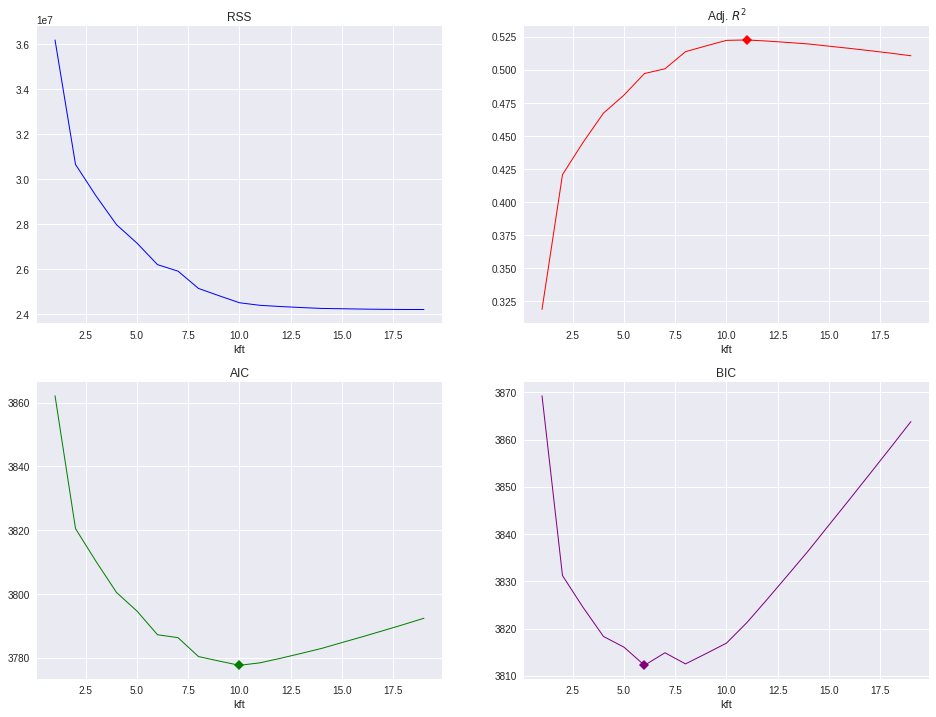

In [19]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
results.rss.plot(title='RSS', lw=1, color='blue')

plt.subplot(2, 2, 2)
max_r2a = results.r2a.argmax()-1
results.r2a.plot(title='Adj. $R^2$', markevery=[max_r2a], marker='D', lw=1, color='red')

plt.subplot(2, 2, 3)
min_aic = results.aic.argmin()-1
results.aic.plot(title='AIC', markevery=[min_aic], marker='D', lw=1, color='green')

plt.subplot(2, 2, 4)
min_bic = results.bic.argmin()-1
results.bic.plot(title='BIC', markevery=[min_bic], marker='D', lw=1, color='purple');

In [20]:
bic_reg = sm.OLS(y, sm.add_constant(X.iloc[:, [0, 1, 5, 11, 14, 15]])).fit()
bic_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     44.18
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           6.82e-37
Time:                        08:35:27   Log-Likelihood:                -1886.6
No. Observations:                 263   AIC:                             3787.
Df Residuals:                     256   BIC:                             3812.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.4397     64.050     -0.491      0.624    -157.571      94.692
AtBat         -1.8686      0.527     -3.543      0.000      -2.907      -0.830
Hits           7.6044      1.663      4.574      0.000       4.330      10.878
Walks          3.6976      1.210      3.055      0.002       1.314       6.081
CRBI           0.6430      0.064      9.979      0.000       0.516       0.770
Division     122.9515     39.820      3.088      0.002      44.534     201.369
PutOuts        0.2643      0.075      3.535      0.000       0.117       0.412
==============================================================================
Omnibus:                      101.319   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.052
Skew:                           1.411   Prob(JB):                    2.77e-134
Kurtosis:                       9.940   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 6.5.2 Forward and Backward Stepwise Selection

This section is a shameless copy-paste from: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab8/Lab%208%20-%20Subset%20Selection%20in%20Python.pdf as they were pretty well structured. I made some small adaptations, that's it.

In [21]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = regr.ssr
    return {'model': regr, 'RSS': RSS}

In [22]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
      
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

def backward(predictors):
    
    results = []
    
    for combo in combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    return best_model

Forward Selection:

In [23]:
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]['model'].model.exog_names

bic_f = []

for m in models2.model:
    bic_f.append(m.bic)
    
np.array(bic_f).argmin()

/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  from ipykernel import kernelapp as app


5

Backward Selection:

In [24]:
models3 = pd.DataFrame(columns=['RSS', 'model'], index = range(1, len(X.columns)))

predictors = X.columns

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]['model'].model.exog_names
    
bic_b = []

for m in models3.model:
    bic_b.append(m.bic)
    
np.array(bic_b).argmin()

/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


7

# 6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation

Heavily borrowed from:

https://nbviewer.jupyter.org/url/www.science.smith.edu/~jcrouser/SDS293/labs/lab9/Lab%209%20-%20Linear%20Model%20Selection%20in%20Python.ipynb

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kranthidr/.virtualenvs/tml-lab/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [26]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {'model':regr, 'RSS':RSS}

In [27]:
def forward(predictors, X_train, y_train, X_test, y_test):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [28]:
models_train = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
    predictors = models_train.loc[i]['model'].model.exog_names

/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  from ipykernel import kernelapp as app


/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  after removing the cwd from sys.path.


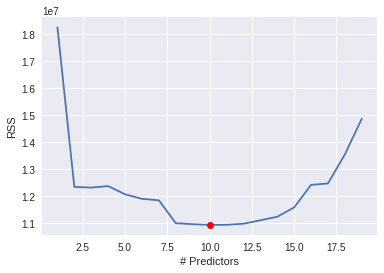

In [29]:
plt.plot(models_train['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train['RSS'].argmin(), models_train['RSS'].min(), 'or');

In [30]:
models_full = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,20):    
    models_full.loc[i] = forward(predictors, X, y, X, y)
    predictors = models_full.loc[i]['model'].model.exog_names

/home/kranthidr/.virtualenvs/tml-lab/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  from ipykernel import kernelapp as app


In [31]:
print(models_train.loc[10, 'model'].model.exog_names)
print(models_full.loc[10, 'model'].model.exog_names)

['CRuns', 'PutOuts', 'CWalks', 'Runs', 'CRBI', 'League', 'AtBat', 'Hits', 'Division', 'Assists']
['Hits', 'CRBI', 'PutOuts', 'AtBat', 'Division', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists']


In [32]:
#TODO cross validation